# Bitmap

**Utiliser la table des matières pour ouvrir/fermer les sections**

## Introduction

Une image *bitmap* se code en utilisant deux valeurs seulement.

Par exemple, on pourrait coder l'image du mot **NSI** en noir et blanc de la façon suivante:

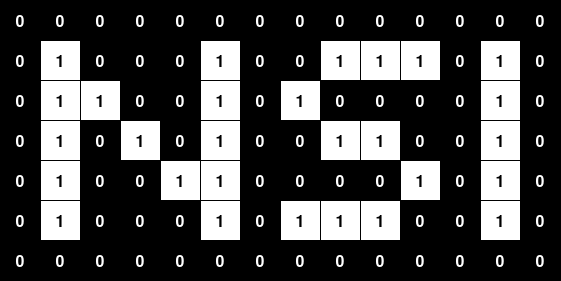

Une telle image est généralement sauvegardée dans un fichier texte (ou non) formaté comme suit:
        
        14 7
        0 0 0 0 0 0 0 0 0 0 0 0 0 0
        0 1 0 0 0 1 0 0 1 1 1 0 1 0
        0 1 1 0 0 1 0 1 0 0 0 0 1 0
        0 1 0 1 0 1 0 0 1 1 0 0 1 0
        0 1 0 0 1 1 0 0 0 0 1 0 1 0
        0 1 0 0 0 1 0 1 1 1 0 0 1 0
        0 0 0 0 0 0 0 0 0 0 0 0 0 0

La première ligne donne (souvent) les dimensions de l'image; ici 14 bits de large pour 7 bits de hauts.

Ainsi pour pouvoir manipuler une telle image par programme, on doit:
- ouvrir le fichier qui la contient en mode «lecture texte»,
- lire son contenu.

On obtient alors une *chaîne de caractère*:

In [ ]:
# à exécuter!
NSI = """14 7
0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 1 0 0 1 1 1 0 1 0
0 1 1 0 0 1 0 1 0 0 0 0 1 0
0 1 0 1 0 1 0 0 1 1 0 0 1 0
0 1 0 0 1 1 0 0 0 0 1 0 1 0
0 1 0 0 0 1 0 1 1 1 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0"""
# ou NSI = "14 7\n0 0 ...\n0 1 ..." 
# il est plus facile d'écrire avec une chaîne multilignes (triple quotes) """..."""

Manipuler une telle chaîne «directement» est très difficile. Pour cette raison, on la **transforme** en **matrice**:
- chaque ligne de la chaîne (excepté la première) devient une liste de nombres,
- toutes ces listes sont regroupées dans une liste globale.

Par exemple:

         la chaîne              la matrice
    (sauf sa 1ère ligne)  
                      est
         3 2       transformé   [
         0 1 0 1       en        [0,1,0,1],
         1 0 1 0    ------>      [1,0,1,0]
                                ]

## De la chaîne formatée à la matrice

Pour pouvoir manipuler l'image, il est utile de transformer cette représentation textuelle en une représentation «liste de listes» c'est-à-dire en une **matrice numérique**. Pour cela, on procède étape par étape:

#### Étape 1: `str -> [str]`

On commence par produire une liste de chaînes `["14 7", "0 0 0 ...", ...]` où chaque chaîne correspond à une ligne de la chaîne d'entrée `"14 7\n0 0 ..."`.

Pour cela, on utilise `split`. Par *exemple* `"a-b-c".split("-")` produit `["a","b","c"]`.

In [ ]:
#1 str -> [str]
# cherche un peu (pas trop longtemps) avant d'étudier la solution.
etape1 = NSI.?
print(etape1)

In [ ]:
etape1 = NSI.split("\n")
print(etape1)

#### Étape 2: `[str] -> [[str]]`

Convertir chaque chaîne dans la liste précédente en une (sous-)liste de chaînes «numériques».

In [ ]:
#2 [str] -> [[str]]
etape2 = [ligne.? for ligne in etape1]
print(etape2)

In [ ]:
#2 [str] -> [[str]]
etape2 = [ligne.split(" ") for ligne in etape1]
print(etape2)

#### Étape 3: `[[str]] -> [[int]]`

Convertir chaque chaîne numérique en un entier à l'aide de `int`.

In [ ]:
#3 [[str]] -> [[int]]
etape3 = [[? for bit in ?] for ligne in etape2]
print(etape3)

In [ ]:
#3 [[str]] -> [[int]]
etape3 = [[int(bit) for bit in ligne] for ligne in etape2]
print(etape3)

#### Étape 4: séparer

Séparer la première ligne (dimensions) des autres

In [ ]:
dim, matrice = etape3[0], etape3[1:] # [1:] -> de l'index 1 jusqu'au dernier
largeur, hauteur = dim # fonctionne car on sait que len(dim)==2
(largeur, hauteur, matrice)

*Note*: Lorsqu'on connaît à l'avance la longueur d'une liste, on peut utiliser la «multi-affectaction» avec *autant de variables* que la liste a *d'éléments*.
Par exemple: si `l=[5,12]`, on peut écrire `a,b=l` et alors `a` vaut `5` et `b` vaut `12`.

Récapitulons:

        au départ                 à l'arrivée
    
    "14 7\n0 0...\n0 1..." --->  largeur = 14, 
                                 hauteur = 7
                                 matrice = [[0 0 ...],
                                            [0 1 ...],
                                            ...
                                           ]

#### Exercice 1

Écrire une fonction `lire_bmp(bmp)` qui «récapitule les étapes précédentes».

Elle prend en argument une chaîne correspondant à une image bitmap (formatée comme indiquée plus tôt) et elle renvoie un *3-uplet* de la forme «(largeur, hauteur, matrice)» où:
- largeur et hauteur correspondent aux dimensions de l'image (entiers!),
- matrice est la liste de listes d'entiers (0 ou 1) qui représente l'image.

In [ ]:
# on suppose que chacune des étapes du début a été correctement exécutée.
assert lire_bmp(NSI) == (largeur, hauteur, matrice)

In [ ]:
def lire_bmp(bmp):
    #1 séparer les lignes: str->[str]
    e1 = bmp.split("\n")
    #2 séparer les colonnes pour chaque ligne: [str]->[[str]]
    e2 = [ligne.split(" ") for ligne in e1]
    #3 convertir chaque «case» de str vers entier: [[str]]->[[int]]
    e3 = [[int(bit) for bit in ligne] for ligne in e2]
    #4 séparer largeur, hauteur (1ère ligne) et matrice (autres lignes)
    dim, matrice = e3[0], e3[1:]
    return dim[0], dim[1], matrice

## Exemples de manipulations

### Visulaliser avec `ipycanvas`

Afin de pouvoir mieux visualiser les choses, nous utiliserons la librairie `ipycanvas` qui permet de dessiner dans un canevas. Lire brièvement et exécuter le code qui suit:

In [ ]:
from ipycanvas import Canvas

def dessiner(matrice, dim_case=10):
    """dessine la matrice fourni en argument.
    La matrice est une liste de listes de bits (entier: 0 ou 1).
    Toutes les listes «internes» sont de même longueur et représente une ligne du dessin.
    Exemple de matrice valide: [[0,1,0,1], [1,0,1,0]]
    """
    h = len(matrice) # hauteur de l'image = nombre de lignes
    l = len(matrice[0]) # largeur de l'image = nombre de valeurs dans une ligne
    
    # Définition de la zone d'affichage (fond blanc)
    # xmin=0, xmax=width, ymin=0, ymax=height
    can = Canvas(width=l*dim_case, height=h*dim_case)
    # couleur de remplissage des rectangles
    can.fill_style = "black"
    
    # parcours de la matrice ligne par ligne
    for i in range(h):
        for j in range(l):
            # si le pixel est éteint
            if matrice[i][j] == 0:
                # afficher un rectangle noir: calcul de son coin supérieur gauche
                x = j * dim_case
                y = i * dim_case
                # la position x,y du coin supérieur gauche, sa largeur et sa hauteur
                can.fill_rect(x, y, dim_case, dim_case)
    return can

Exemples d'utilisation:

In [ ]:
dessiner(
    [[0,1,0,1], 
     [1,0,1,0]]
)

In [ ]:
dessiner(
    [[0,1,0,1], 
     [1,0,1,0]],
    dim_case=50
)

In [ ]:
#largeur, hauteur, matrice
lg_nsi, ht_nsi, nsi_mat = lire_bmp(NSI)
dessiner(nsi_mat)

**ATTENTION**: par la suite, nous réutiliserons les noms `lg_nsi`, `ht_nsi` (largeur, hauteur) et `nsi_mat` (matrice) pour expérimenter. **Ne pas affecter une nouvelle valeur à ces noms**.

### Négatif

On souhaite inverser les bits (0 -> 1, 1 -> 0) de façon à échanger noir et blanc. Pour cela on peut utiliser une fonction (à compléter): 

In [ ]:
def inv(b):
    """inverse le bit fourni."""
    ___

In [ ]:
def inv(b):
    if b == 0:
        return 1
    else:
        return 0

Il suffit alors de l'appliquer à chaque bit de l'image:

In [ ]:
nsi_inv = [[inv(bit) for bit in ligne] for ligne in nsi_mat]
dessiner(nsi_inv)

Ou, en utilisant les *index* (et c'est important de bien comprendre cette autre écriture pour la suite):

In [ ]:
nsi_inv = [
     [inv(nsi_mat[i][j]) for j in range(lg_nsi)] 
     for i in range(ht_nsi)
]
dessiner(nsi_inv)

*Note-rappel*: L'opérateur *ternaire* (car il a trois places «vacantes») `<expr1> if <condition> else <expr2>` produit:
- la valeur de l'expression 1 si la condition est vraie
- celle de l'expression 2 sinon. 

Par exemple:
- l'expression `1 if bit == 0 else 0` permet de se passer de la fonction `inv`.
- l'expression `x if x >= 0 else -x` permet de se passer de la fonction valeur absolue `abs`.

#### Exercice 2

Ré-écrire l'inversion du bitmap en utilisant l'opérateur ternaire expliqué dans la note précédente.

In [ ]:
nsi_inv = ?
dessiner(nsi_inv)

In [ ]:
nsi_inv = [
    [0 if bit == 1 else 1 for bit in ligne] 
    for ligne in nsi_mat
]
dessiner(nsi_inv)

____

### Symétries

#### Maîtriser les index

On souhaite inverser la gauche et la droite c'est à dire appliquer une symétrie d'axe vertical à l'image. Pour cela il est nécessaire de *bien comprendre le lien entre l'index d'un pixel et celui de son symétrique*.

Commençons par nous mettre les idées au clair sur les **déplacements d'une case à une autre**.

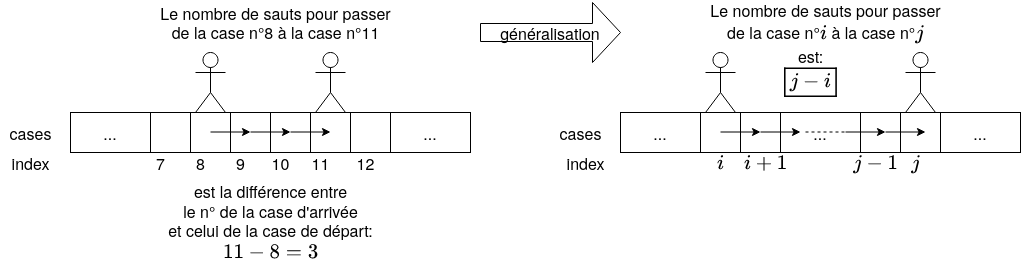

> **Retenir**: le passage d'une case d'index $i$ à une case d'index $j$ correspond à un déplacement de $\boxed{j-i}$ cases (*indépendamment de la numérotation*).

Si deux cases d'index $i$ et $i'$ se correspondent dans une symétrie «gauche-droite», on peut observer qu'on a deux déplacements **égaux**:
- de la **première case** à la case d'index $i$,
- de la case d'index $i'$ à la **dernière case**.

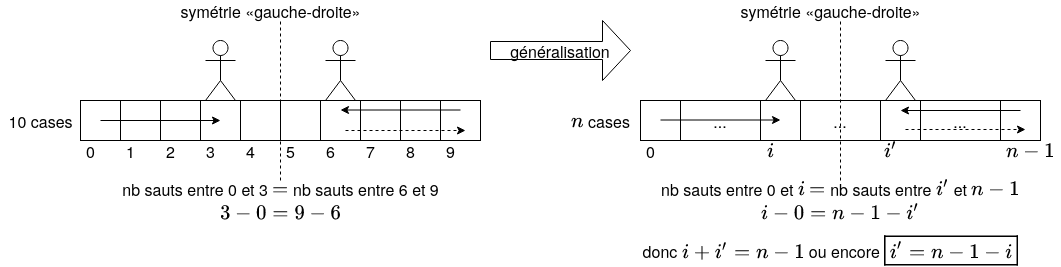

Ce déplacement vaut clairement $i$ si la première case a pour index $0$ et pour trouver $i'$:

> il suffit d'appliquer ce déplacement en *sens contraire* en partant de la dernière case.

Ainsi, si le tableau a $n$ cases et que la numérotation démarre à $0$, la dernière case a l'index $n-1$ et donc: $$\boxed{i'=(n-1)-i}$$

Par exemple, pour lire un tableau de la droite vers la gauche:

In [ ]:
tab = [10, 11, 12, 13, 14]
n = len(tab)
for i in range(n):
    print(tab[(n-1)-i]) # (n-1)-i est l'index du symétrique de la case n°i

ou, pour construire le tableau «miroir»:

In [ ]:
tab = [10, 11, 12, 13, 14]
n = len(tab)
miroir = [tab[(n-1)-i] for i in range(n)]
print(miroir)

#### Exercice 3

Trouver une formule analogue ($i'$ en fonction de $i$) dans le cas où la numérotation du tableau débute à $1$.

Dans ce cas le déplacement (de la première case à celle d'index $i$) vaut $i-1$ et l'index de la dernière case est $n$ donc $$i'=n-(i-1)\quad \text{ou, après simplification}\quad i'=n-i+1$$

___

Finalement, pour effectuer une symétrie «gauche-droite» de l'image, il suffit de changer chaque «ligne» par son «miroir»:

In [ ]:
# ? à remplacer...
nsi_symv = [
    [ ? for j in range(lg_nsi)] # miroir de «ligne»
    for ligne in nsi_mat
]
dessiner(nsi_symv)

In [ ]:
nsi_symv = [
    [ ligne[largeur-1-j] for j in range(largeur)] 
    for ligne in nsi
]
dessiner(nsi_symv)

ou, ce qui revient au même:

In [ ]:
# ? à remplacer...
nsi_symv = [
    [ ? for j in range(lg_nsi) ]
    for i in range(hg_nsi)
]
dessiner(nsi_symv)

In [ ]:
# ou, ce qui revient au même
nsi_symv = [
    [ nsi[i][largeur-1-j] for j in range(largeur) ]
    for i in range(hauteur)
]
dessiner(nsi_symv)

#### Exercice 4

Utiliser l'écriture en compréhension pour produire le symétrique de l'image par rapport à un axe horizontal. Par exemple:

    100            111
    100   devient  100
    111            100

In [ ]:
nsi_symh = ___

In [ ]:
# on prend le miroir de la matrice dans son ensemble
nsi_symh = [
    nsi_mat[(ht_nsi-1)-i] for i in range(ht_nsi)
]
dessiner(nsi_symh)

______

### Quart de tour

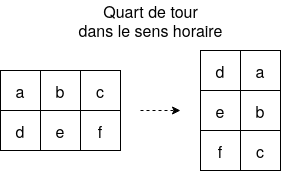

#### Exercice 5

En vous aidant de l'image précédente, utiliser l'écriture en compréhension pour appliquer un quart de tour dans le sens horaire à l'image. 

*Aide*: bien établir le lien entre les lignes de l'image *après transformation* (ce qu'il faut produire) et les «éléments» correspondant dans *l'image initiale*.

In [ ]:
# ? à remplacer
nsi_qdt = ?

#### Solution

On observe que les nouvelles lignes de l'image correspondent aux colonnes «miroirs» de l'image initiale:

In [ ]:
nsi_qdt = [ 
    # miroir de la colonne j
    [nsi_mat[ht_nsi-1-i][j] for i in range(ht_nsi) ]
    for j in range(lg_nsi)
]
dessiner(nsi_qdt)

______

## De la matrice à la chaîne formatée

Après avoir manipulé l'image par programme, on souhaite souvent sauvegarder dans un fichier le résultat obtenu (autrement il sera perdu dès que le programme termine ou en cas de coupure de courant).

Il est donc nécessaire de transformer la matrice qui code cette image en une chaîne de caractères **formatée** (du moins si on veut la sauvegarder dans un fichier texte).

On procède de façon similaire à ce qu'on a fait pour décoder cette chaîne mais *à l'envers*.

#### Étape 1: `[[int]] -> [[str]]`

Transformer chaque ligne (liste d'entiers) de la matrice en une liste de chaînes à l'aide de `str`:

In [ ]:
#1 [[int]] -> [[str]]
# ? à remplacer...
etape1 = [[? for bit in ?] for ligne in nsi]
etape1

In [ ]:
etape1 = [[str(bit) for bit in ligne] for ligne in nsi]
etape1

#### Étape 2: `[[str]] -> [str]`

Transformer chaque ligne obtenue en une chaîne de "0" et de "1" séparé par un espace. Pour cela on peut utiliser `join`. Par exemple,  `"->".join(["a","b","c"])` produit `"a->b->c"`.

In [ ]:
#2 [[str]] -> [str]
etape2 = [?.join(?) for ligne in etape1]
etape2

In [ ]:
etape2 = [" ".join(ligne) for ligne in etape1]
etape2

#### Étape 3: `[str] -> str`

Transformer la liste obtenue en une chaîne où chaque élément est séparé par un saut de ligne:

In [ ]:
#3 [str] -> str
etape3 = ?.join(etape2)
etape3

In [ ]:
etape3 = "\n".join(etape2)
etape3

#### Étape 4: regrouper

4. Ajouter au début de cette chaîne la largeur et la hauteur:

In [ ]:
#4
etape4 = f"{largeur} ?"

In [ ]:
etape4 = f"{largeur} {hauteur}\n{etape2}"

#### Exercice 6

Écris une fonction `ecrire_bmp(l,h,m)` qui récapitule les étapes précédentes. `l` et `h` correspondent à la largeur et la hauteur de l'image et `m` à la matrice qui la représente.  Elle renvoie la chaîne formatée à sauvegarder. 

In [ ]:
def ecrire_bmp(l, h, m):
    m1 = [[str(b) for b in lg] for lg in m] # [[int]] -> [[str]]
    m2 = [" ".join(lg) for lg in m1] # «[[str]]» -> «[str]»
    m3 = "\n".join(m2) # «[str]» -> str
    # ne pas oublier la largeur et la hauteur
    return f"{l} {h}\n{m3}"

## Synthèse

Les images les plus simples (noir et blanc) sont appelées *bitmaps*. On peut les représenter simplement avec une chaîne de caractères **formatée**. Ce format consiste (par exemple) à représenter un pixel noir par "0" et un blanc par "1" et à séparer les différentes lignes de l'image par un saut de ligne "\n" dans le texte. La première ligne du texte donne souvent les dimensions de l'image (largeur, hauteur).

Ainsi l'image est simplement représentée par un *flux structuré de caractères* ce qui est commode pour la **sauvegarder** sur le disque (dans un fichier) mais *pas pour sa manipulation* par programme.

Lorsqu'un programme ouvre une image, la première action qu'il entreprend est donc de transformer la chaîne obtenue en une structure interne plus adaptée appelée **matrice** et qui consiste en un tableau de nombres (à deux dimensions). 

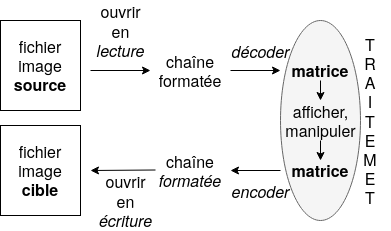

Après avoir effectué le traitement voulu (affichage, transformation géométrique...) et pour sauvegarder le résultat, le programme doit à nouveau transformer la matrice qui représente l'image en une chaîne de caractères qui respecte le format qui lui a permis de l'ouvrir au début.